In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('2019-2.csv')

In [11]:
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'OvRank', 'PPR', 'Fmb', 'GS'], axis = 1, inplace = True)

In [12]:
df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,TD,Int,...,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,FL,TD.3,PosRank
0,Christian McCaffrey*\McCaCh01,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,1
1,Lamar Jackson*\JackLa00,BAL,QB,22,15,265,401,3127,36,6,...,6.85,7,0,0,0,NaN,0,2,7,1
2,Derrick Henry*\HenrDe00,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,2
3,Aaron Jones\JoneAa00,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,3
4,Ezekiel Elliott*\ElliEz00,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,4


In [21]:
df.rename({
    'TD': 'PassingTD', 
    'TD.1': 'RushingTD', 
    'TD.2': 'ReceivingTD', 
    'TD.3': 'TotalTD', 
    'Yds': 'PassingYds', 
    'Yds.1': 'RushingYds', 
    'Yds.2': 'ReceivingYds', 
    'Att': 'PassingAtt', 
    'Att.1': 'RushingAtt'
}, axis = 1, inplace = True)

In [27]:
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

In [28]:
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

In [24]:
df.head()

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYds,PassingTD,Int,...,Y/A,RushingTD,Tgt,Rec,ReceivingYds,Y/R,ReceivingTD,FL,TotalTD,PosRank
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,...,4.83,15,142,116,1005,8.66,4,0,19,1
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,...,6.85,7,0,0,0,NaN,0,2,7,1
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,...,5.08,16,24,18,206,11.44,2,3,18,2
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,...,4.59,16,68,49,474,9.67,3,2,19,3
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,...,4.51,12,71,54,420,7.78,2,2,14,4


In [29]:
rushing_columns = ['RushingAtt', 'RushingYds', 'Y/A', 'RushingTD',]
receiving_columns = ['Tgt', 'Rec', 'ReceivingYds', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYds', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL']]
    return df

In [30]:
rb_df = transform_columns(rb_df, rushing_columns + receiving_columns)
wr_df = transform_columns(wr_df, rushing_columns + receiving_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns)

rb_df.head()

,Player,Tm,Age,G,RushingAtt,RushingYds,Y/A,RushingTD,Tgt,Rec,ReceivingYds,Y/R,ReceivingTD,FL
0,Christian McCaffrey,CAR,23,16,287,1387,4.83,15,142,116,1005,8.66,4,0
2,Derrick Henry,TEN,25,15,303,1540,5.08,16,24,18,206,11.44,2,3
3,Aaron Jones,GNB,25,16,236,1084,4.59,16,68,49,474,9.67,3,2
4,Ezekiel Elliott,DAL,24,16,301,1357,4.51,12,71,54,420,7.78,2,2
5,Dalvin Cook,MIN,24,14,250,1135,4.54,13,63,53,519,9.79,0,2


In [33]:
rb_df['FantasyPoints'] = rb_df['RushingYds'] * 0.1 + rb_df['RushingTD'] * 6 + rb_df['Rec']
+ rb_df['ReceivingYds'] * 0.1 + rb_df['ReceivingTD']*6 - rb_df['FL']*2

0      124.5
2       26.6
3       61.4
4       50.0
5       47.9
8       21.8
9      143.3
10      50.7
16      30.6
20      55.8
22      46.7
23      28.7
28      50.2
35      14.6
37      66.9
40      57.3
41       8.2
45      32.5
47      19.6
60      26.0
63      50.1
66      20.5
71       0.2
74       7.4
95      61.0
96      29.6
97      26.9
98      10.2
100     92.5
103     29.5
       ...  
440      0.9
442      2.3
443      0.9
449      0.0
455      0.9
456      0.0
461      0.0
473      2.2
477      1.7
484      1.1
487      1.3
492      0.0
494      1.3
497      1.9
498      0.0
500      0.0
503      0.0
508      0.0
512      0.0
513      0.5
515      0.0
519      0.0
522      0.8
523      0.0
533      0.0
535      0.0
547      0.0
573      0.0
576      0.4
578      0.1
Length: 153, dtype: float64

In [34]:
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))

In [35]:
rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt']) / rb_df['G']
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x,2))

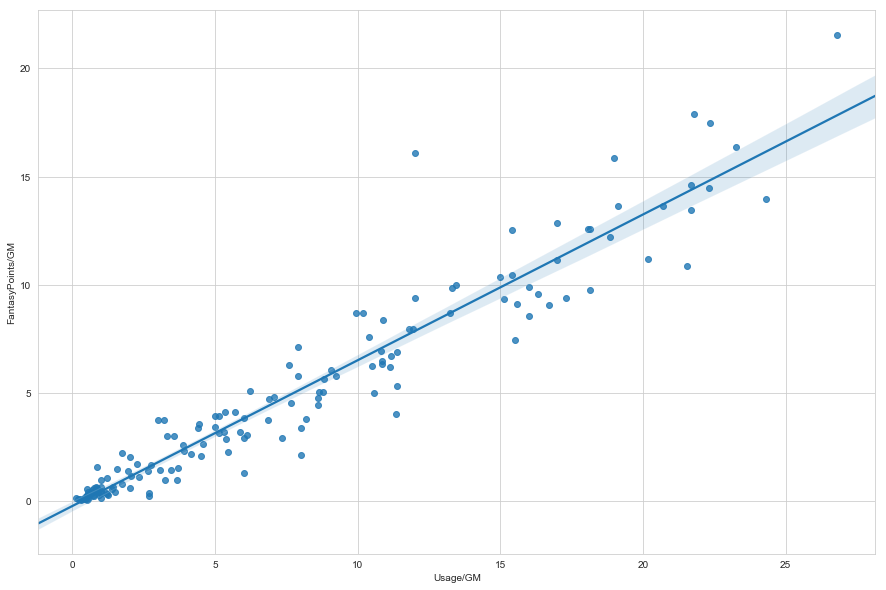

In [36]:
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(
x = rb_df['Usage/GM'],
y = rb_df['FantasyPoints/GM'],
scatter = True,)


In [38]:
rb_df['TD/Usage'] = (rb_df['RushingTD'] + rb_df['ReceivingTD']) / (rb_df['RushingAtt'] + rb_df['Tgt'])

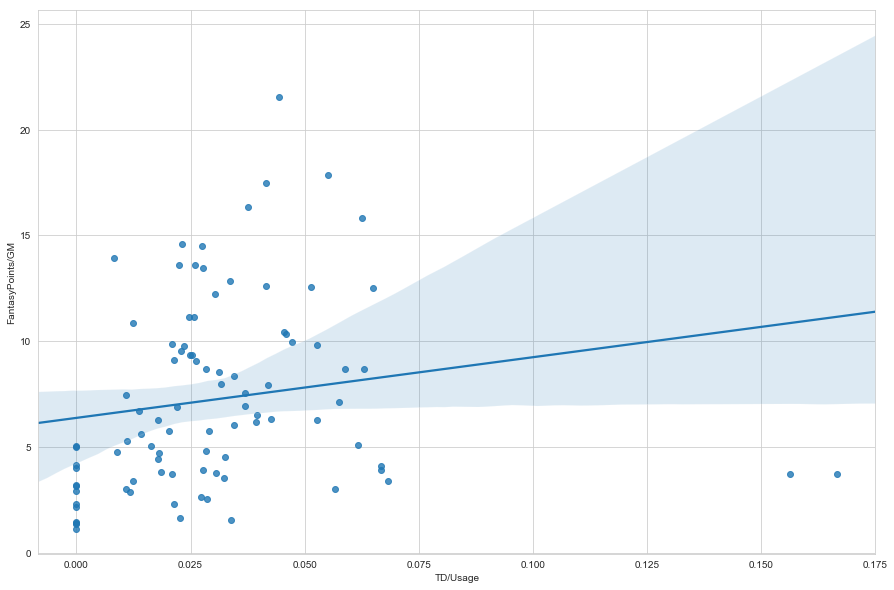

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

rb_df = rb_df[rb_df['RushingAtt'] > 20]

plot = sns.regplot(
x = rb_df['TD/Usage'],
y = rb_df['FantasyPoints/GM'],
scatter = True,)